<a href="https://colab.research.google.com/github/coreymunk/Deep-Learning-CIFAR-100/blob/main/baseline_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, UpSampling2D, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical



Now lets use a high-performing out of the box model as a baseline and see what happens. This model utilizes a ResNet50 architecture and I found it on [Kaggle](https://www.kaggle.com/code/saileshnair/cifar-100-transfer-learning-resnet50). Salesh Nair created the code for it and we adapted it for this project. We trained the model on about a 1/3 of the available data so we could run the model to its completion.

## Using Resnet50 for Transfer Learning and classify the Cifar - 100 data

### The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images

## Importing Libraries

In [17]:
import datetime, os
log_dir = "logs"

# Create the directory if it doesn't exist
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

# Check if the directory was created successfully
"Directory created successfully" if os.path.exists(log_dir) else "Failed to create directory"

'Directory created successfully'

In [18]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


## Importing the Cifar 100 Dataset

In [19]:
cifar100 = tf.keras.datasets.cifar100
(X_train, Y_train), (X_test,Y_test) = cifar100.load_data()
# Load the CIFAR-100 dataset
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar100.load_data()




In [20]:
# Select the desired subsets (first 10000 for training and first 1000 for testing)
X_train_subset = X_train[:50000]
Y_train_subset = Y_train[:50000]
X_test_subset = X_test[:10000]
Y_test_subset = Y_test[:10000]

In [21]:
def timer(start_time=None):
  #function to track time
  if not start_time:
      print(datetime.now())
      start_time = datetime.now()
      return start_time
  elif start_time:
      thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
      tmin, tsec = divmod(temp_sec, 60)
      print('Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

def plot_acc_loss(result):
  # function to plot the accuracy and loss graphs
  acc = result.history['accuracy']
  val_acc = result.history['val_accuracy']
  loss = result.history['loss']
  val_loss = result.history['val_loss']

  plt.figure(figsize=(20, 10))
  plt.subplot(1, 2, 1)
  plt.title("Training and Validation Accuracy")
  plt.plot(acc,color = 'green',label = 'Training Acuracy')
  plt.plot(val_acc,color = 'red',label = 'Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.subplot(1, 2, 2)
  plt.title('Training and Validation Loss')
  plt.plot(loss,color = 'blue',label = 'Training Loss')
  plt.plot(val_loss,color = 'purple',label = 'Validation Loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(loc='upper right')
  plt.show()

##  Plotting some images from the dataset

In [22]:
# plt.figure(figsize=(12,12))
# for i in range(100):
#   plt.subplot(10,10,1+i)
#   plt.axis('off')
#   plt.imshow(X_train[i],cmap='gray')

## Splitting the train data again - we use the val set as test set and previous test set for final predictions

In [23]:
x_train,x_val,y_train,y_val = train_test_split(X_train_subset, Y_train_subset, test_size = 0.2)







##  Onehot encoding of the outputs

In [24]:
y_train = to_categorical(y_train, num_classes = 100)
y_val = to_categorical(y_val, num_classes = 100)
y_test = to_categorical(Y_test, num_classes = 100)

In [25]:
x_train = x_train * 1.0/255
x_val = x_val * 1.0/255
X_test_subset = X_test_subset * 1.0/255



In [26]:
print(x_train.shape, x_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(40000, 32, 32, 3) (10000, 32, 32, 3) (10000, 32, 32, 3)
(40000, 100) (10000, 100) (10000, 100)


##  Image Data Augmentation

In [27]:
def model_performance(history):
        # Plots
        plt.figure(figsize=(20, 4))

        # plot accuracy
        plt.subplot(1, 3, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.ylim(0, 1)
        plt.legend()

        # plot loss
        plt.subplot(1, 3, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        # plot learning rate changes
        plt.subplot(1, 3, 3)
        plt.plot(history.history['lr'], label='Learning Rate')
        plt.xlabel('Epochs')
        plt.ylabel('Learning Rate')
        plt.title('Learning Rate Changes')
        plt.legend()

        plt.tight_layout()
        plt.show()

        # Training Data
        final_train_accuracy = history.history['accuracy'][-1]
        final_train_loss = history.history['loss'][-1]
        print('Training Performance:')
        print(f"Accuracy: {round(final_train_accuracy*100, 2)}%")
        print(f"Loss: {round(final_train_loss, 4)}")

        # Validation Data
        final_val_accuracy = history.history['val_accuracy'][-1]
        final_val_loss = history.history['val_loss'][-1]
        print('\nValidation Performance:')
        print(f"Accuracy: {round(final_val_accuracy*100, 2)}%")
        print(f"Loss: {round(final_val_loss, 4)}")

# model_performance(hist)

In [28]:
train_datagen = ImageDataGenerator(
        rotation_range = 10,
        zoom_range = 0.1,
        width_shift_range = 0.1,
        height_shift_range = 0.1,
        shear_range = 0.1,
        horizontal_flip = True,
        vertical_flip = False
        )
train_datagen.fit(x_train)

##  Reduce Learning Rate if accuracy is not improving for 3 epochs

In [29]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=3,
    verbose=1,
    factor=0.6,
    min_lr=1e-6)

##  Importing the Resnet Model

In [30]:
from tensorflow.keras.applications.resnet50 import ResNet50
resnet_model = ResNet50(
    include_top = False,
    weights = 'imagenet',
    input_shape = (224,224,3)
)

for layer in resnet_model.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False

In [31]:
resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

##  Converting the output layer as per our dataset

In [32]:
model=tf.keras.models.Sequential()
model.add(UpSampling2D(size=(7, 7),interpolation='bilinear'))
model.add(resnet_model)
model.add(GlobalAveragePooling2D())
model.add(Dropout(.25))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(100, activation='softmax'))

### **Issue** : The Cifar images are of the shape 32,32,3 and resnet model is trained on images of 224,224,3

### *Solution* : Rezise Images - this is a costly operation and i eventually ran out of memory many a times

### **Used Solution** : Keras provides an upsampling layer – called UpSampling2D – which allows to perform upsampling operation within neural networks
* ### 32 * 7 = 224


### Stochastic gradient descent optimizer with momentum.

In [33]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9)

Compile the model

In [34]:
import datetime

model.compile(
    optimizer = optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

We now Train the model on images. we are also checking to see if validation accuracy doesnt improve we will reduce learning rate though the callback

In [ ]:
from datetime import datetime

start_time=timer(None)
result=model.fit(
    train_datagen.flow(x_train, y_train, batch_size = 128),
    validation_data = (x_val, y_val),
    epochs = 70,
    verbose = 1,
    callbacks=[tensorboard_callback, learning_rate_reduction])
timer(start_time)


2024-03-13 16:31:01.382153
Epoch 1/70
313/313 [==============================] - 122s 341ms/step - loss: 4.2432 - accuracy: 0.0938 - val_loss: 9.1141 - val_accuracy: 0.0112 - lr: 0.0010
Epoch 2/70
313/313 [==============================] - 102s 327ms/step - loss: 3.0893 - accuracy: 0.2656 - val_loss: 6.3202 - val_accuracy: 0.0128 - lr: 0.0010
Epoch 3/70
313/313 [==============================] - 102s 327ms/step - loss: 2.5951 - accuracy: 0.3587 - val_loss: 3.0912 - val_accuracy: 0.2533 - lr: 0.0010
Epoch 4/70
313/313 [==============================] - 102s 327ms/step - loss: 2.3071 - accuracy: 0.4151 - val_loss: 2.0070 - val_accuracy: 0.4768 - lr: 0.0010
Epoch 5/70
313/313 [==============================] - 102s 327ms/step - loss: 2.1006 - accuracy: 0.4560 - val_loss: 1.8519 - val_accuracy: 0.5082 - lr: 0.0010
Epoch 6/70
313/313 [==============================] - 102s 327ms/step - loss: 1.9519 - accuracy: 0.4895 - val_loss: 1.7638 - val_accuracy: 0.5231 - lr: 0.0010
Epoch 7/70
313/313 

In [ ]:
%tensorboard --logdir logs

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d (UpSampling2  (None, None, None, None   0         
 D)                          )                                   
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 batch_normalization (Batch  (None, 256)               1

## Plot accuracy and Loss

In [ ]:
plot_acc_loss(result)


## Predictions,Accuracy and Confusion Matrix

In [45]:
y_pred = np.argmax(model.predict(X_test_subset), axis=-1)
y_true = Y_test_subset.ravel()
print(y_pred.shape,y_true.shape)


313/313 [==============================] - 9s 28ms/step
(10000,) (10000,)


In [44]:
print("Testing Accuracy: ", accuracy_score(y_true,y_pred))

Testing Accuracy:  0.7276


In [43]:
cm = confusion_matrix(y_true,y_pred)
cm

array([[85,  0,  0, ...,  0,  0,  0],
       [ 0, 80,  1, ...,  0,  0,  0],
       [ 0,  1, 66, ...,  0,  3,  0],
       ...,
       [ 0,  0,  0, ..., 72,  0,  0],
       [ 0,  0,  5, ...,  0, 47,  0],
       [ 0,  0,  0, ...,  0,  0, 83]])

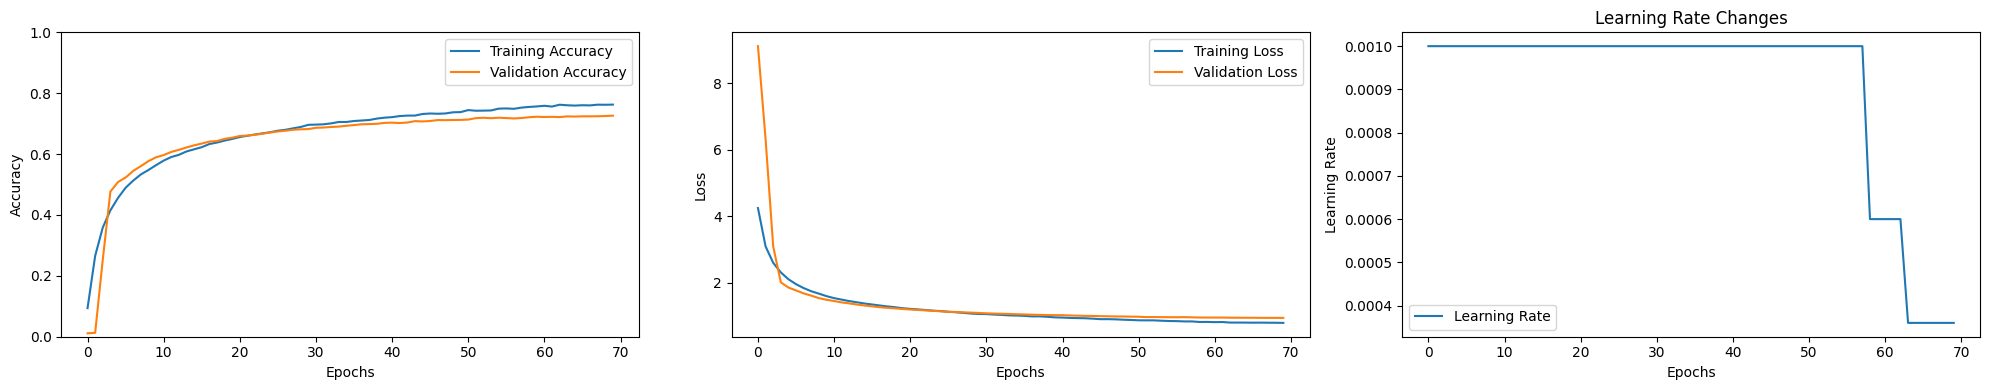

Training Performance:
Accuracy: 76.25%
Loss: 0.7872

Validation Performance:
Accuracy: 72.62%
Loss: 0.9379


In [46]:
model_performance(result)

# Out of the Box Model: What Did We Learn?

First, it is important to note that only a portion of the CIFAR100 data was used in this run. The model achived ~70% training accuracy and ~60% testing accuracy. If we gave the model more or all of the available data we would have seen significantly better performance. ResNet models regularly achive 80-90% accuracy on this dataset.

ResNet models utilize the concept of residual blocks. These allow the neural net to skip over certain layers using shortcuts. The residual block tries to learn by looking at the residuals between the input and the target output. This helps reduce the vanishing gradient problem. This particular model is called ResNet50 because it has 50 layers.

It is worth asking why the model did not overfit. This particular model was created to prevent overfitting. If you look at the outpout from the run you'll see the model automatically reduced the learning rate every time it was at risk of overfitting. By the time the model hit epoch 148 it had its final reduction in learning rate.

Another important feature of this model was image augmentation. This effectively gives us more data by providing some variation to the original dataset. This model was set up to perform the following augmentations:


1.   Rotation: Random image rotation of up to 10 degrees
2.   Zoom: Random zooms up to 10%
3.   Width and Height Shift: Both can be shifted up to 10%
4.   Shear: Images are randomly sheared by up to 10%
5.   Horizontal and Vertical flip: Images are randomly flipped horizontally but not vertically.

We implemented Tensorboard into the model. It is a built in visualization package for Tensorflow. You can view documentation for this feature [here](https://www.tensorflow.org/tensorboard).

According to the graphs Tensor board created, we can see that the beta and gamma parameters bounced aroudn quite a bit during the beginning and middle of the run then finally stabilized toward the end.

We also generated a graph to show accuracy and loss for both the training and validation sets. These support the graphics created by Tensorboard. The model learned well during the beginning of the run but stalled out toward the end.

Running this model on limited data taught us quite a bit. First, we how to add some advanced features to our model, particularly data augmentation. Second, we learned how to interpret the batch normalization visualizations Tensorboard created on a complicated model.  



